# Ecoulement avec saut de porosite en 2D

In [1]:
from trustutils import run

run.introduction("Y. Gorsse")
run.description("Ecoulement unidirectional, sans diffusion. Le domaine est discretise en 2D. Le calcul est mene sur differents maillages (cartesien conforme, triangles et non conforme).")
run.TRUST_parameters()

## Introduction 
 Validation made by : Y. Gorsse



 Report generated 04/02/2022

### Description 
Ecoulement unidirectional, sans diffusion. Le domaine est discretise en 2D. Le calcul est mene sur differents maillages (cartesien conforme, triangles et non conforme).

### TRUST parameters 
 * Version TRUST: 1.8.5_beta
 * Binary used: /export/home/adrien/Projets/TRUST/TRUST_LOCAL/exec/TRUST_mpi_opt (built on TRUST /export/home/adrien/Projets/TRUST/TRUST_LOCAL/Validation/Rapports_automatiques/Verification/Verification_codage/porosite_2D/build)

In [2]:
from trustutils import run
import os, sys

# We will need MEDCoupling - so load it in the Python path:
run.useMEDCoupling()

# Trigger the copy of the src directory into the build directory:
run.defaultSuite_ = run.TRUSTSuite(runPrepare=False)

# Path of weird mesh Python module
sys.path.append(os.environ["TRUST_ROOT"] + "/Validation/Rapports_automatiques/Verification/PolyMAC/share/maquette_decapoly/src/")

# Invoke prepare_python.py (which structures the directories), and copy post_run script
origin, build_dir = os.getcwd(), run.defaultSuite_.getBuildDirectory()
os.chdir(build_dir)
exec(open( "prepare_python.py").read())  #  the various run.addCase() are called there
!for cas in */*/maillage_* ; do cp post_run ${cas}/. ; done
os.chdir(origin)

run.printCases()
run.runCases()
run.executeScript("extract_convergence")

### Test cases 
* cartesian/VDF/maillage_20x30/jdd.data : 
* cartesian/PolyMAC/maillage_20x30/jdd.data : 
* cartesian/CoviMAC/maillage_20x30/jdd.data : 
* triangle/VEFPreP1B/maillage_20x30/jdd.data : 
* triangle/PolyMAC/maillage_20x30/jdd.data : 
* triangle/CoviMAC/maillage_20x30/jdd.data : 
* NCa/PolyMAC/maillage_20x30/jdd.data : 
* NCa/CoviMAC/maillage_20x30/jdd.data : 
* NCr/PolyMAC/maillage_20x30/jdd.data : 
* NCr/CoviMAC/maillage_20x30/jdd.data : 


Running **with Sserver**...
  => A total of 10 cases were (successfully) run in 30.2s.


## Results

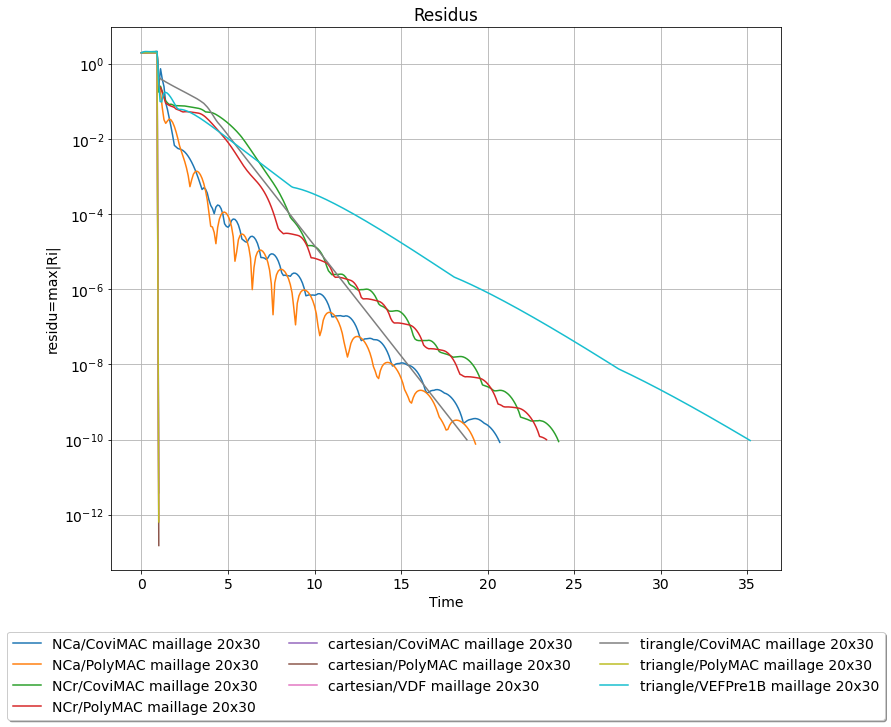

In [3]:
from trustutils import plot

a=plot.Graph("Residus")
a.addResidu("NCa/CoviMAC/maillage_20x30/jdd.dt_ev",label="NCa/CoviMAC maillage 20x30")
a.addResidu("NCa/PolyMAC/maillage_20x30/jdd.dt_ev",label="NCa/PolyMAC maillage 20x30")
a.addResidu("NCr/CoviMAC/maillage_20x30/jdd.dt_ev",label="NCr/CoviMAC maillage 20x30")
a.addResidu("NCr/PolyMAC/maillage_20x30/jdd.dt_ev",label="NCr/PolyMAC maillage 20x30")
a.addResidu("cartesian/CoviMAC/maillage_20x30/jdd.dt_ev",label="cartesian/CoviMAC maillage 20x30")
a.addResidu("cartesian/PolyMAC/maillage_20x30/jdd.dt_ev",label="cartesian/PolyMAC maillage 20x30")
a.addResidu("cartesian/VDF/maillage_20x30/jdd.dt_ev",label="cartesian/VDF maillage 20x30")
a.addResidu("triangle/CoviMAC/maillage_20x30/jdd.dt_ev",label="tirangle/CoviMAC maillage 20x30")
a.addResidu("triangle/PolyMAC/maillage_20x30/jdd.dt_ev",label="triangle/PolyMAC maillage 20x30")
a.addResidu("triangle/VEFPreP1B/maillage_20x30/jdd.dt_ev",label="triangle/VEFPre1B maillage 20x30")

a.scale(yscale='log')
a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)


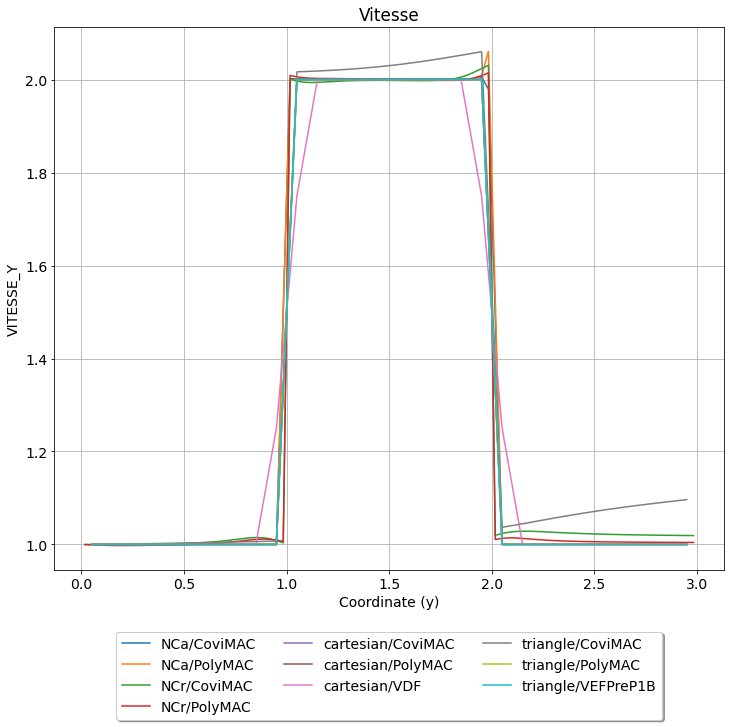

In [4]:
a=plot.Graph("Vitesse")
a.addSegment("NCa/CoviMAC/maillage_20x30/jdd_V.son",label="NCa/CoviMAC",compo=1)
a.addSegment("NCa/PolyMAC/maillage_20x30/jdd_V.son",label="NCa/PolyMAC",compo=1)
a.addSegment("NCr/CoviMAC/maillage_20x30/jdd_V.son",label="NCr/CoviMAC",compo=1)
a.addSegment("NCr/PolyMAC/maillage_20x30/jdd_V.son",label="NCr/PolyMAC",compo=1)
a.addSegment("cartesian/CoviMAC/maillage_20x30/jdd_V.son",label="cartesian/CoviMAC",compo=1)
a.addSegment("cartesian/PolyMAC/maillage_20x30/jdd_V.son",label="cartesian/PolyMAC",compo=1)
a.addSegment("cartesian/VDF/maillage_20x30/jdd_V.son",label="cartesian/VDF",compo=1)
a.addSegment("triangle/CoviMAC/maillage_20x30/jdd_V.son",label="triangle/CoviMAC",compo=1)
a.addSegment("triangle/PolyMAC/maillage_20x30/jdd_V.son",label="triangle/PolyMAC",compo=1)
a.addSegment("triangle/VEFPreP1B/maillage_20x30/jdd_V.son",label="triangle/VEFPreP1B",compo=1)

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

## Ordres de convergence

### Ordres de convergence - v

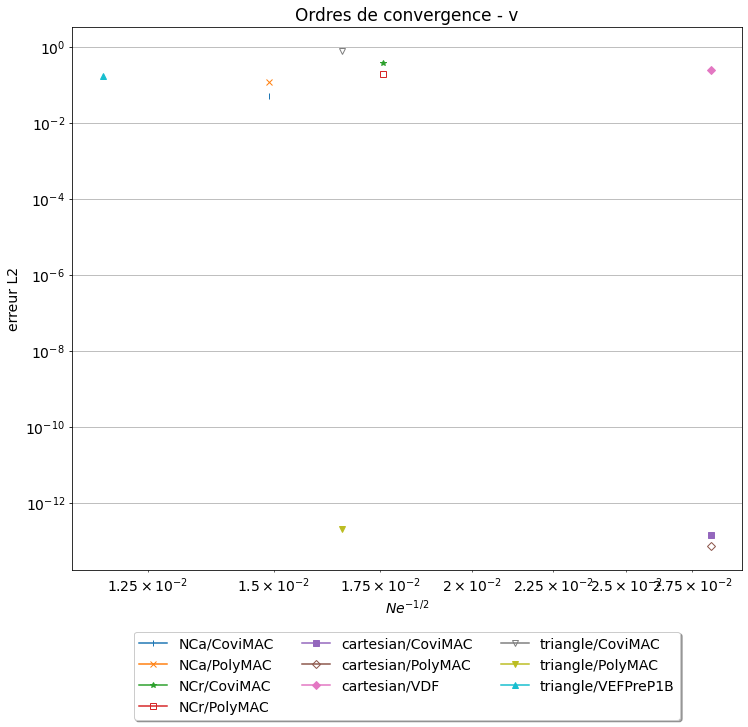

In [5]:
a=plot.Graph("Ordres de convergence - v")

x = plot.loadText("NCa/CoviMAC/conv_glob_v")
a.add(x[0],x[1],marker='-|',label="NCa/CoviMAC")

x = plot.loadText("NCa/PolyMAC/conv_glob_v")
a.add(x[0],x[1],marker='-x',label="NCa/PolyMAC")

x = plot.loadText("NCr/CoviMAC/conv_glob_v")
a.add(x[0],x[1],marker='-*',label="NCr/CoviMAC")

x = plot.loadText("NCr/PolyMAC/conv_glob_v")
a.add(x[0],x[1],marker='-s',markerfacecolor='None',label="NCr/PolyMAC")

x = plot.loadText("cartesian/CoviMAC/conv_glob_v")
a.add(x[0],x[1],marker='-s',label="cartesian/CoviMAC")

x = plot.loadText("cartesian/PolyMAC/conv_glob_v")
a.add(x[0],x[1],marker='-D',markerfacecolor='None',label="cartesian/PolyMAC")

x = plot.loadText("cartesian/VDF/conv_glob_v")
a.add(x[0],x[1],marker='-D',label="cartesian/VDF")

x = plot.loadText("triangle/CoviMAC/conv_glob_v")
a.add(x[0],x[1],marker='-v',markerfacecolor='None',label="triangle/CoviMAC")

x = plot.loadText("triangle/PolyMAC/conv_glob_v")
a.add(x[0],x[1],marker='-v',label="triangle/PolyMAC")

x = plot.loadText("triangle/VEFPreP1B/conv_glob_v")
a.add(x[0],x[1],marker='-^',label="triangle/VEFPreP1B")

a.label(r"$Ne^{-1/2}$","erreur L2")
a.scale(xscale='log',yscale='log')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

### Ordres de convergence - p

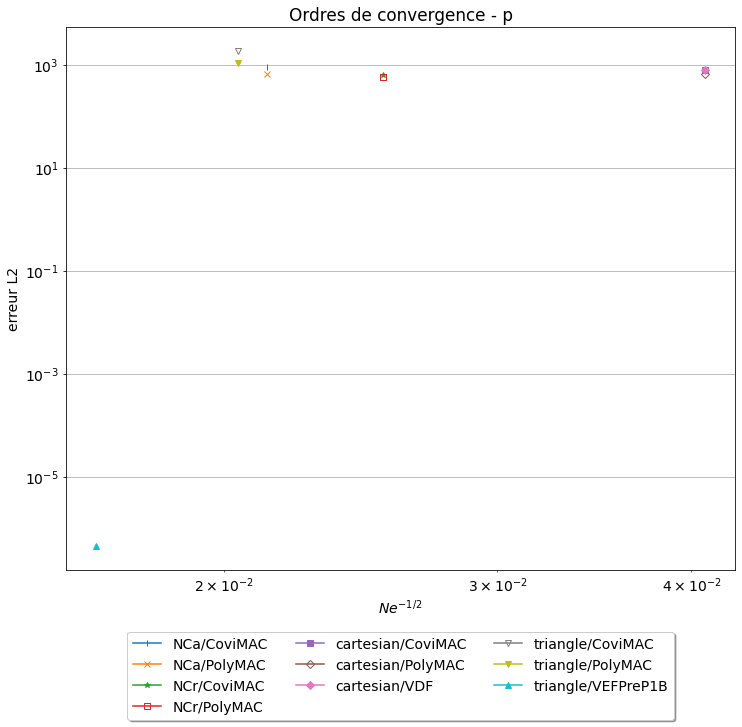

In [6]:
a=plot.Graph("Ordres de convergence - p")

x = plot.loadText("NCa/CoviMAC/conv_glob_p")
a.add(x[0],x[1],marker='-|',label="NCa/CoviMAC")

x = plot.loadText("NCa/PolyMAC/conv_glob_p")
a.add(x[0],x[1],marker='-x',label="NCa/PolyMAC")

x = plot.loadText("NCr/CoviMAC/conv_glob_p")
a.add(x[0],x[1],marker='-*',label="NCr/CoviMAC")

x = plot.loadText("NCr/PolyMAC/conv_glob_p")
a.add(x[0],x[1],marker='-s',markerfacecolor='None',label="NCr/PolyMAC")

x = plot.loadText("cartesian/CoviMAC/conv_glob_p")
a.add(x[0],x[1],marker='-s',label="cartesian/CoviMAC")

x = plot.loadText("cartesian/PolyMAC/conv_glob_p")
a.add(x[0],x[1],marker='-D',markerfacecolor='None',label="cartesian/PolyMAC")

x = plot.loadText("cartesian/VDF/conv_glob_p")
a.add(x[0],x[1],marker='-D',label="cartesian/VDF")

x = plot.loadText("triangle/CoviMAC/conv_glob_p")
a.add(x[0],x[1],marker='-v',markerfacecolor='None',label="triangle/CoviMAC")

x = plot.loadText("triangle/PolyMAC/conv_glob_p")
a.add(x[0],x[1],marker='-v',label="triangle/PolyMAC")

x = plot.loadText("triangle/VEFPreP1B/conv_glob_p")
a.add(x[0],x[1],marker='-^',label="triangle/VEFPreP1B")

a.label(r"$Ne^{-1/2}$","erreur L2")
a.scale(xscale='log',yscale='log')

a.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)